# Нелінійні Алгоритми Машинного Навчання

## Нелінійне моделювання та узагальнення

До цього моменту ми ілюстрували лінійну регресію як «проведення лінії через дані», 
але насправді це було функцією наших вхідних характеристик.

Хоча це може здаватися обмеженим, алгоритми лінійної регресії є досить потужними, коли застосовуються 
до нелінійних характеристик вхідних даних.

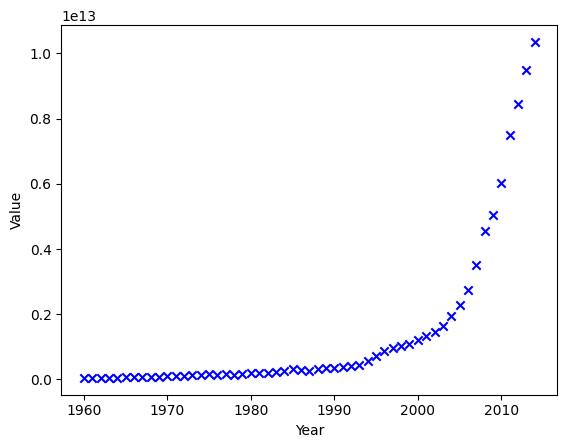

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt
    # plt.show()

build_plot('../resources/china_gdp.csv', 'Year', 'Value').show()

Якщо провести лінію через цей графік, отримаємо наступне:

[[5.72950686e+12]
 [6.29430498e+12]]
[array([1.12959624e+11]), array([-2.23013731e+14])]


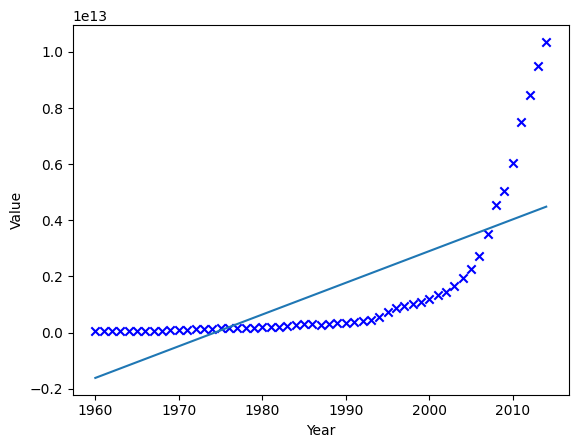

In [2]:
plt = build_plot('../resources/china_gdp.csv', 'Year', 'Value')
data = pd.read_csv('../resources/china_gdp.csv')
x, y = data['Year'], data['Value']
x_reshaped, y_reshaped = x.values.reshape(-1, 1), y.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression(fit_intercept=True)
model.fit(x_reshaped, y_reshaped)
Xnew = np.array([[2025], [2030]])
print(model.predict(Xnew))

theta = [ model.coef_[0], model.intercept_ ]
print(theta)

X_line = np.linspace(x_reshaped.min(), x_reshaped.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

plt.plot(X_line, y_line)

## Поліноміальна Регресія

Polynomial regression is a form of linear regression where we model the relationship between 
$x$ and $y$ as an $n$-degree polynomial:

$$y = \beta_{0} + \beta_{1} x + \beta_{2} x^{2} + ... + \beta_{n} x^{n} + \epsilon$$

It allows us to model non-linear relationships by adding polynomial terms of the features.

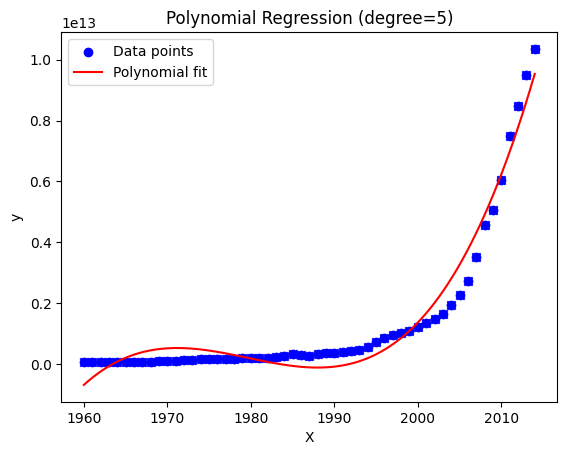

Intercept: [-2.1028827e+17]
Coefficients: [[ 0.00000000e+00  1.20746941e+03  2.72901110e+05  2.71121389e+08
  -2.05442021e+05  4.15121802e+01]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

plt = build_plot('../resources/china_gdp.csv', 'Year', 'Value')
data = pd.read_csv('../resources/china_gdp.csv')
x, y = data['Year'], data['Value']
x_reshaped, y_reshaped = x.values.reshape(-1, 1), y.values.reshape(-1, 1)

# transform input features to polynomial features
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(x_reshaped)

# fit the model
model = LinearRegression()
model.fit(X_poly, y_reshaped)

# predict and visualize
X_plot = np.linspace(min(x_reshaped), max(x_reshaped), 100).reshape(-1, 1)
y_pred = model.predict(poly.transform(X_plot))

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(X_plot, y_pred, color='red', label='Polynomial fit')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression (degree=5)")
plt.legend()
plt.show()

# coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


## Узагальнення та перенавчання

Проблема з канонічною задачею машинного навчання полягає в тому, що нас насправді не 
цікавить мінімізація цієї цілі на заданому наборі даних.

Нас насправді цікавить, наскільки добре наша функція узагальниться на нових прикладах,
які ми не використовували для навчання системи (але які взяті з «того самого 
розподілу», що й приклади, які ми використовували для навчання)

Поліноми вищого ступеня демонстрували перенавчання: вони фактично мають дуже низькі
втрати на даних навчання, але створюють функції, які, як ми очікуємо, не будуть добре узагальнюватися

У міру ускладнення моделі втрати навчання завжди зменшуються; втрати узагальнення 
зменшуються до певної точки, а потім починають збільшуватися

![nonlinear](../resources/ml-nonlinear.png)

Хоча важко кількісно оцінити справжню помилку узагальнення (тобто помилку цих 
алгоритмів щодо повного розподілу можливих прикладів), ми можемо 
наблизити її за допомогою **перехресної валідації**

Основна ідея полягає в тому, щоб розділити набір даних на навчальний набір і набір для перевірки. Навчіть алгоритм на навчальному наборі і оцініть на наборі для перевірки.

Ми називаємо змінні $\theta$ *параметрами* алгоритму машинного навчання.
Але є й інші величини, які також впливають на класифікатор: ступінь полінома, 
кількість регуляризації тощо; їх сукупно називають 
*гіперпараметрами* алгоритму.

Основна ідея перехресного валідації: використовувати навчальний набір для визначення параметрів, використовувати 
резервний набір для визначення гіперпараметрів.


**k-кратна перехресна валідація (k-folds validation):** 

Більш складна (але насправді дещо більш поширена) версія перехресної валідації.
Розділіть набір даних на $k$ роз'єднаних підмножин (складок); навчіть на $k-1$ і оцініть на 
залишковій складці; повторіть $k$ разів, утримуючи кожну складку один раз. Повідомте середню похибку для всіх утриманих складок.

**Варіанти**

*Перехресна валідація «залиш один»*: обмеження k-кратної перехресної валідації, де кожна 
складка є лише одним прикладом (тож ми навчаємося на всіх інших прикладах, тестуючи 
цей один приклад)
[Дещо дивно, але для найменших квадратів це можна обчислити ефективніше, ніж k-кратну 
перехресну валідацію, з такою ж складністю вирішення для оптимального 𝜃 за допомогою матричного рівняння] 

*Стратифікована перехресна валідація*: збереження приблизно рівного відсотка 
позитивних/негативних прикладів (або будь-якої іншої ознаки) у кожному згині

*Попередження*: k-кратна перехресна валідація не завжди є кращою (наприклад, у прогнозуванні часових рядів 
бажано, щоб набір утриманих даних був повністю сформований після набору навчання)


## Класифікація

Accuracy: 0.9181286549707602


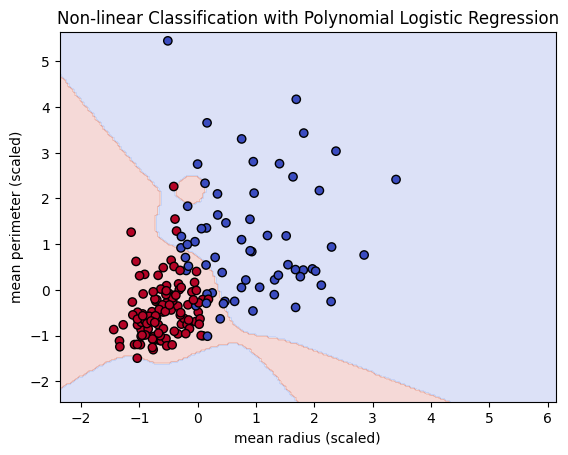

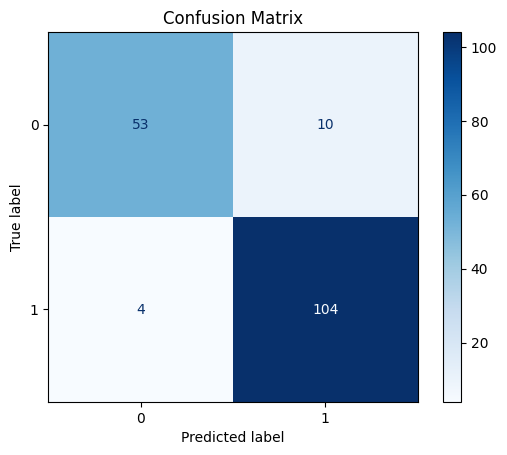

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# Load dataset (only 2 features for visualization)
data = load_breast_cancer()
X = data.data[:, [3, 25]]  # mean radius, mean perimeter
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add polynomial features (non-linear transformation)
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train logistic regression on polynomial features
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train_poly, y_train)

# Evaluate
y_pred = clf.predict(X_test_poly)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualization (decision boundary)
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.xlabel('mean radius (scaled)')
plt.ylabel('mean perimeter (scaled)')
plt.title('Non-linear Classification with Polynomial Logistic Regression')
plt.show()

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Метод Опорних Векторів (Support Vector Machine)

Метод опорних векторів — це алгоритм класифікації, який шукає оптимальну гіперплощину, що розділяє дані двох класів із максимальним зазором (margin).

Нехай ми маємо навчальну вибірку:

$$
{(x_i, y_i)}_{i=1}^n, \quad x_i \in \mathbb{R}^d, \quad y_i \in {-1, +1}
$$

Ми шукаємо гіперплощину, яка має вигляд:

$$
w^T x + b = 0
$$

де

* $w$ — вектор ваг (нормаль до гіперплощини),
* $b$ — зсув (bias).


**Умова коректної класифікації**: Для всіх навчальних точок повинно виконуватись:

$$
y_i (w^T x_i + b) \ge 1
$$

Це означає, що всі точки знаходяться по правильний бік гіперплощини, причому на відстані не менше 1 від неї.

**Відстань (margin)**: Відстань від точки до гіперплощини дорівнює:

$$
\frac{|w^T x + b|}{|w|}
$$

Ми хочемо максимізувати цей зазор між класами.
Для двох крайніх точок зазор дорівнює:

$$
\text{margin} = \frac{2}{|w|}
$$

Отже, щоб його максимізувати, потрібно мінімізувати $|w|^2$.


**Оптимізаційна задача (лінійно роздільний випадок)**:

$$
\begin{aligned}
\min_{w, b} \quad & \frac{1}{2}|w|^2 \
\text{за умови:} \quad & y_i (w^T x_i + b) \ge 1, \quad i = 1, \dots, n
\end{aligned}
$$

Це **опукла квадратична задача оптимізації**.


**Нероздільні дані — м’який зазор**: У реальних даних можливі помилки класифікації, тому вводять змінні послаблення $\xi_i \ge 0$:

$$
\begin{aligned}
\min_{w, b, \xi} \quad & \frac{1}{2}|w|^2 + C \sum_{i=1}^n \xi_i \
\text{за умови:} \quad & y_i (w^T x_i + b) \ge 1 - \xi_i, \quad i = 1, \dots, n
\end{aligned}
$$

де $C > 0$ — параметр, що задає компроміс між шириною зазору та кількістю помилок.


**Ядровий трюк (kernel trick)**: Щоб працювати з нелінійно роздільними даними, SVM використовує перетворення простору:

$$
\phi: \mathbb{R}^d \to \mathbb{R}^m
$$

але замість явного обчислення $\phi(x)$ застосовується **ядро** $K(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle$.

Типові ядра:

* Лінійне: $K(x, x') = x^T x' $
* Поліноміальне: $K(x, x') = (x^T x' + 1)^d$
* Радіально-базисне (RBF): $K(x, x') = \exp(-\gamma |x - x'|^2) $


**Рішення у вигляді опорних векторів**: У результаті оптимізації маємо:

$$
f(x) = \text{sign}\left(\sum_{i=1}^n \alpha_i y_i K(x_i, x) + b\right)
$$

де $\alpha_i$ — коефіцієнти лагранжа.
Точки, для яких $\alpha_i > 0$, називаються *опорними векторами* — саме вони визначають гіперплощину.


**Геометрична інтерпретація**

- SVM шукає межу, яка найбільше віддалена від найближчих точок обох класів.
- Тільки кілька опорних векторів визначають положення цієї межі.

![nonlinear](../resources/ml-nonlinear-2.png)

Accuracy: 0.9298245614035088


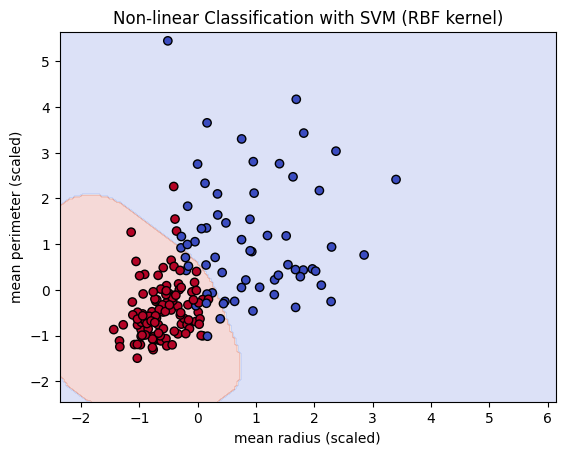

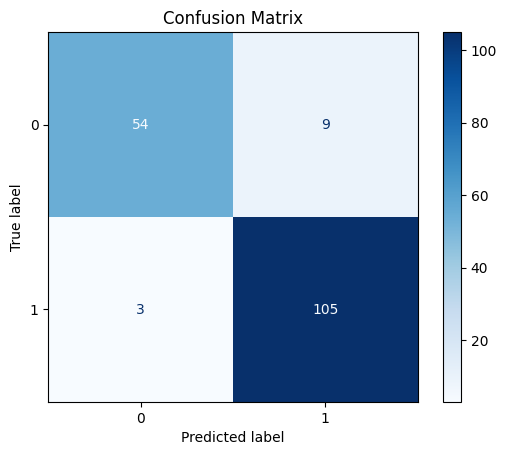

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# Load dataset (only 2 features for visualization)
data = load_breast_cancer()
X = data.data[:, [3, 25]]  # mean radius, mean perimeter
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with RBF kernel
clf = SVC(kernel='rbf', gamma='scale', C=1.0)
clf.fit(X_train_scaled, y_train)

# Evaluate
y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualization (decision boundary)
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.xlabel('mean radius (scaled)')
plt.ylabel('mean perimeter (scaled)')
plt.title('Non-linear Classification with SVM (RBF kernel)')
plt.show()

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Наївний баєсів класифікатор (Naive Bayes classifier)

Наївний баєсівський класифікатор — це ймовірнісний метод класифікації, який базується на теоремі Байєса.
Він оцінює, до якого класу належить об’єкт $ x $, обчислюючи ймовірність $P(C_k | x)$ для кожного класу $C_k$.

Теорема Байєса: основна формула

$$P(C_k | x) = \frac{P(x | C_k) , P(C_k)}{P(x)}$$

де:

* $P(C_k | x)$ — апостеріорна ймовірність класу після спостереження ознак;
* $P(x | C_k)$ — правдоподібність (як імовірно отримати ознаки, якщо відомий клас);
* $P(C_k)$ — апріорна ймовірність класу;
* $P(x)$ — нормувальний коефіцієнт (спільна ймовірність ознак).

**"Наївне" припущення незалежності**: Метод вважає, що всі ознаки $x_1, x_2, \dots, x_n$ незалежні одна від одної, якщо відомо, до якого класу належить об’єкт.

$$P(x | C_k) = \prod_{j=1}^n P(x_j | C_k)$$

Це *"наївне" припущення* значно спрощує обчислення, навіть якщо насправді ознаки частково залежать.

**Формула класифікації** Підставимо у формулу Байєса:

$$
P(C_k | x) \propto P(C_k) \prod_{j=1}^n P(x_j | C_k)
$$

Оскільки $ P(x) $ однакова для всіх класів, її можна не враховувати при порівнянні.

Отже, ми вибираємо клас з максимальною апостеріорною ймовірністю:

$$
\hat{C} = \arg\max_{C_k} ; P(C_k) \prod_{j=1}^n P(x_j | C_k)
$$



Accuracy: 0.9181286549707602


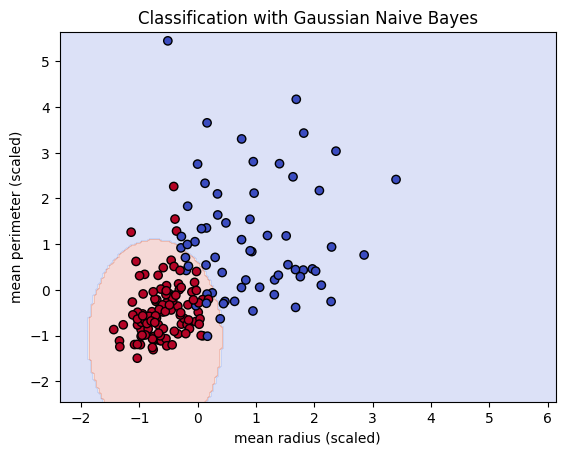

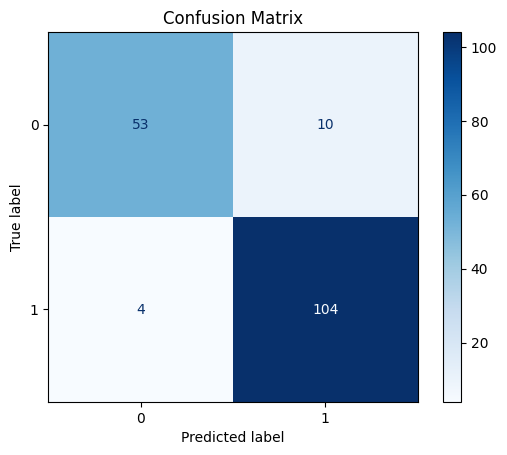

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# Load dataset (only 2 features for visualization)
data = load_breast_cancer()
X = data.data[:, [3, 25]]  # mean radius, mean perimeter
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale data (optional but improves numerical stability)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gaussian Naive Bayes model
clf = GaussianNB()
clf.fit(X_train_scaled, y_train)

# Evaluate
y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualization (decision boundary)
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.xlabel('mean radius (scaled)')
plt.ylabel('mean perimeter (scaled)')
plt.title('Classification with Gaussian Naive Bayes')
plt.show()

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
